In [16]:
import sys, os

sys.path.append(os.path.abspath(os.path.join('..', '..',)))

from autonormalize.autonormalize import normalize_entity
import featuretools as ft

ImportError: cannot import name 'normalize_entity' from 'autonormalize.autonormalize' (/usr/local/lib/python3.7/site-packages/autonormalize/autonormalize.py)

2019-08-15 11:59:14,814 featuretools.entityset - WARNING    ('Using first column as index. ', 'To change this, specify the index parameter')


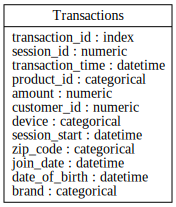

In [14]:
df = ft.demo.load_mock_customer(n_customers=80, n_products=50, n_sessions=200, 
                                n_transactions=10000, return_single_table=True)
es = ft.EntitySet(id='Transactions')
es.entity_from_dataframe('Transactions', df)
es.plot()

In [18]:
def normalize_entity(es):
    if len(es.entities) > 1:
        raise ValueError('There is more than one entity in this EntitySet')
    if len(es.entities) == 0:
        raise ValueError('This EntitySet is empty')
    entity = es.entities()[0]
    new_es = an.auto_entityset(entity.df, accuracy, index=entity.index, name=es.id, time_index=entity.time_index)
    return new_es
new_es = normalize_entity(es)

TypeError: 'list' object is not callable

In [6]:
print(deps)

 {transaction_time}  --> transaction_id
 {join_date,amount}  {amount,customer_id}  {amount,product_id}  {session_start}  {transaction_id}  {transaction_time}  {amount,date_of_birth}  --> session_id
 {transaction_id}  --> transaction_time
 {amount,session_id}  {join_date,amount}  {session_start,amount}  {amount,customer_id}  {transaction_id}  {amount,device,brand,zip_code}  {transaction_time}  {amount,date_of_birth}  --> product_id
 {transaction_time}  {transaction_id}  --> amount
 {join_date}  {amount,product_id}  {session_id}  {date_of_birth}  {session_start}  {transaction_id}  {transaction_time}  --> customer_id
 {join_date,amount}  {amount,customer_id}  {amount,product_id}  {session_id}  {session_start}  {transaction_id}  {transaction_time}  {amount,date_of_birth}  --> device
 {join_date,amount}  {amount,customer_id}  {amount,product_id}  {session_id}  {transaction_id}  {transaction_time}  {amount,date_of_birth}  --> session_start
 {join_date}  {amount,product_id}  {amount,device,br

In [7]:
entityset = an.make_entityset(df, deps, name="Customer Transactions", time_index='transaction_time')

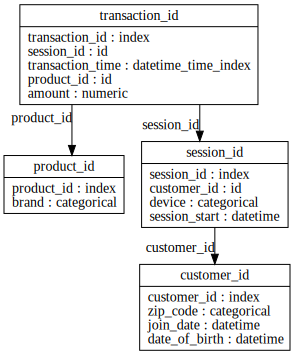

In [8]:
entityset.plot()

In [9]:
fm, features = ft.dfs(entityset=entityset, target_entity='session_id')
features

[<Feature: customer_id>,
 <Feature: device>,
 <Feature: SUM(transaction_id.amount)>,
 <Feature: STD(transaction_id.amount)>,
 <Feature: MAX(transaction_id.amount)>,
 <Feature: SKEW(transaction_id.amount)>,
 <Feature: MIN(transaction_id.amount)>,
 <Feature: MEAN(transaction_id.amount)>,
 <Feature: COUNT(transaction_id)>,
 <Feature: NUM_UNIQUE(transaction_id.product_id)>,
 <Feature: MODE(transaction_id.product_id)>,
 <Feature: DAY(session_start)>,
 <Feature: YEAR(session_start)>,
 <Feature: MONTH(session_start)>,
 <Feature: WEEKDAY(session_start)>,
 <Feature: customer_id.zip_code>,
 <Feature: NUM_UNIQUE(transaction_id.DAY(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.YEAR(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.MONTH(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.WEEKDAY(transaction_time))>,
 <Feature: NUM_UNIQUE(transaction_id.product_id.brand)>,
 <Feature: MODE(transaction_id.DAY(transaction_time))>,
 <Feature: MODE(transaction_id.YEAR(transacti

In [11]:
entityset = ft.EntitySet(entities={"transaction_id": (df, "transaction_id", "transaction_id")})

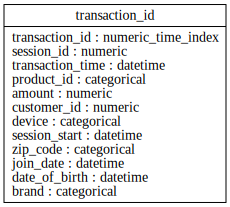

In [12]:
entityset.plot()